# **Recap of the KNN Algorithm**
Remember the KNN Algorithm looks at the known points around the target points and predicts that its outcome is similar to the points around it. For any new points, it checks for the "K" points that are closest in terms of the defined distance metric. Once these are identified, the outcome of each of those points is then identified based on the training set. The outcome of the point is defined based on a majority vote principle. For example, if we look for the 5 nearest to a given target point, if 3 of those points are red and 2 of those points are blue. Red has the majority vote because the target point has 3 red dots whereas blue has 2 blue points near it.

# **KNN Classification Example Using Scikit-Learn**

Scikit-learn is a popular Machine Learning for Python. In this notebook we'll be using it to build a classifier using K Nearest Neighbors algorithm to classify wines.


# **Imports**
Imports needed for this notebook

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# **Setting Up The Data**
Here we load the given dataset provided by sklearn. X and Y have data stored within them and the given data is respectively split.

In [34]:
dataset = datasets.load_wine()
X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
print('Shape of X', X.shape)

Shape of X (178, 13)


In [27]:
print('Shape of Y', y.shape)

Shape of Y (178,)


# **Model Fitting**
Here we are using KNeighborsClassifier to fit the given data to get scores, predictions, etcetera wanted. I would leave n_neghbors alone, because its 5 by default.

In [35]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

# **Predictions & Scores**
After fitting the model we print the given predictions and scores. We print the classification report and confusion matric for the KNN Classifier

In [36]:
y_pred = y_test
predictions = model.predict(X_test)
cr = metrics.classification_report(y_pred, predictions, target_names=dataset.target_names)
cm = metrics.confusion_matrix(y_pred, predictions)

In [37]:
print(cr)
print(cm)

              precision    recall  f1-score   support

     class_0       0.72      0.93      0.81        14
     class_1       0.69      0.60      0.64        15
     class_2       0.57      0.50      0.53        16

    accuracy                           0.67        45
   macro avg       0.66      0.68      0.66        45
weighted avg       0.66      0.67      0.66        45

[[13  0  1]
 [ 1  9  5]
 [ 4  4  8]]


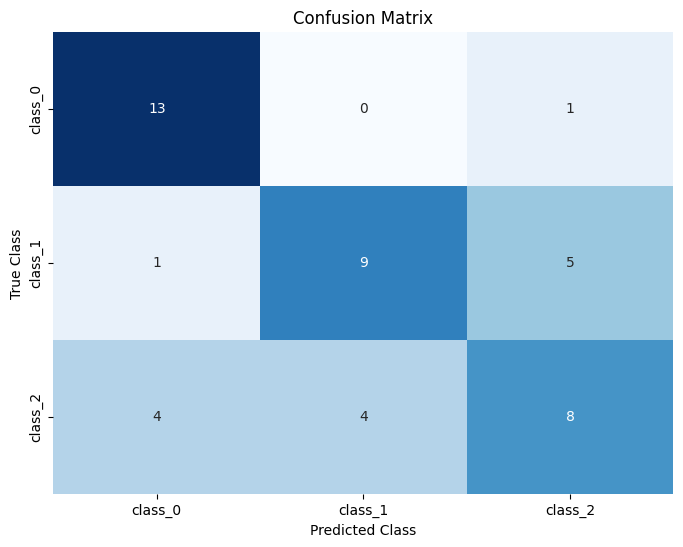

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=dataset.target_names,
            yticklabels=dataset.target_names)
plt.title("Confusion Matrix")
plt.xlabel('Predicted Class')
plt.ylabel("True Class")
plt.show()